<Axes: >

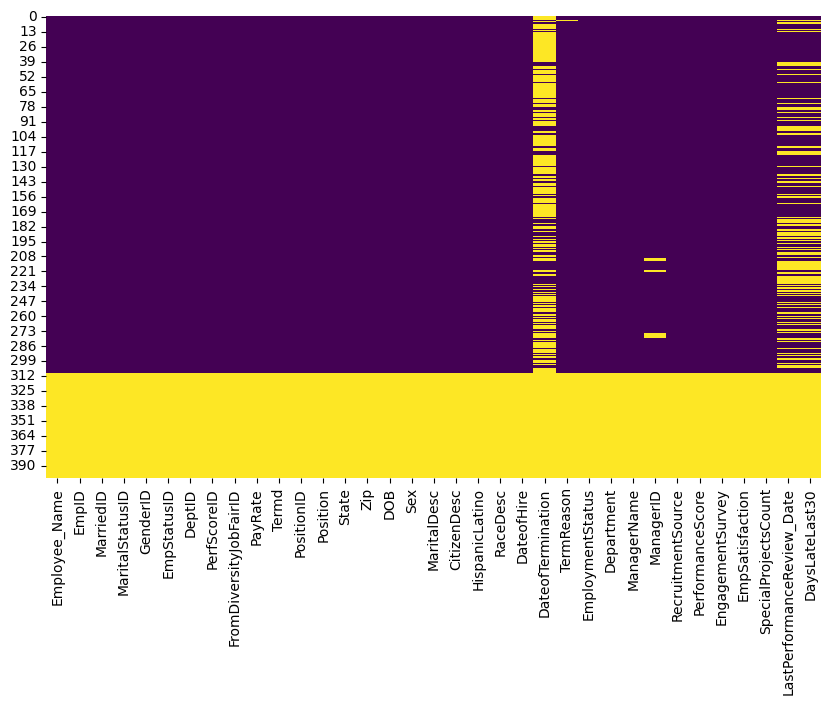

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

df = pd.read_csv('HRDataset.csv')
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')


<Axes: >

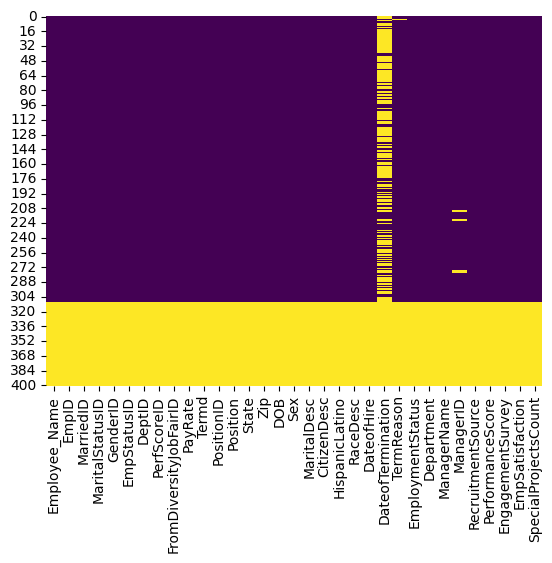

In [175]:
df.drop(columns=['DaysLateLast30', 'LastPerformanceReview_Date' ], inplace=True)
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')


<Axes: >

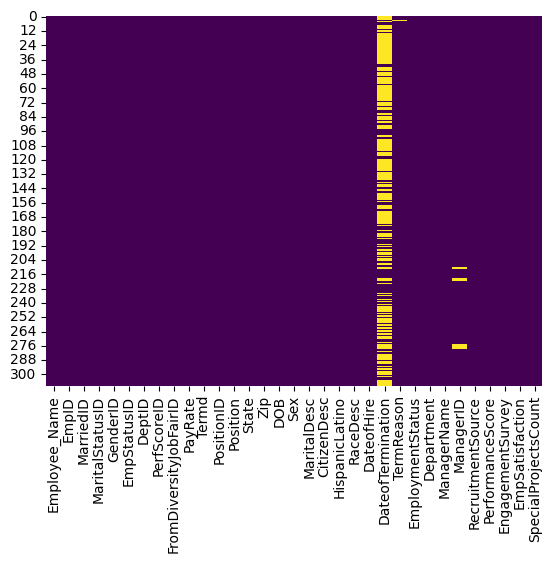

In [176]:
df.dropna(inplace=True, thresh=2)
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')


# Zadanie 1

In [177]:
manager_counts = df.groupby('ManagerID')['EmpID'].count().sort_values(ascending=False)
manager_counts

ManagerID
20.0    22
18.0    22
16.0    22
12.0    21
14.0    21
19.0    21
22.0    21
11.0    21
2.0     19
4.0     17
17.0    14
7.0     14
21.0    13
39.0    13
10.0     9
13.0     8
5.0      7
1.0      6
6.0      4
15.0     3
9.0      2
3.0      1
30.0     1
Name: EmpID, dtype: int64

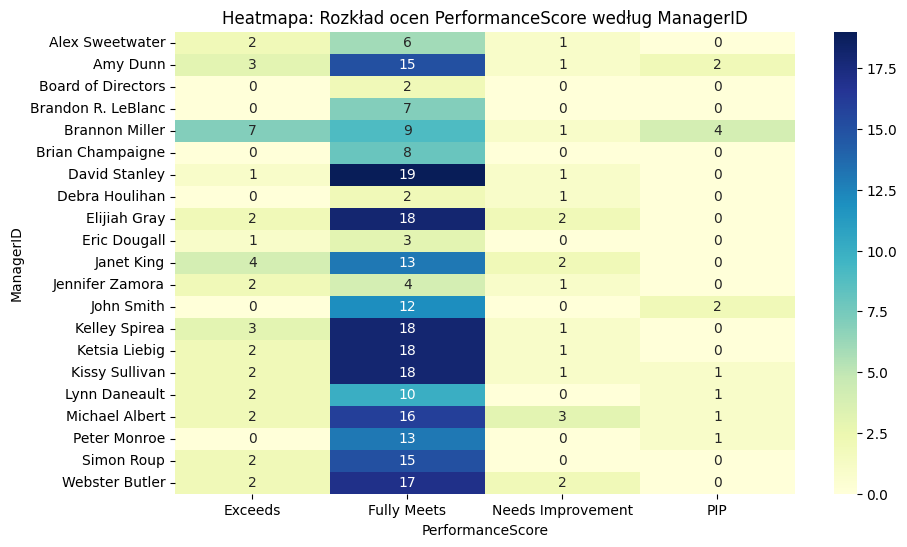

In [178]:
# Tworzenie wykresu
score_order = ['PIP', 'Needs Improvement', 'Fully Meets', 'Exceeds']
# Stwórz tabelę przestawną: liczba ocen wg ManagerID i PerformanceScore
pivot = pd.pivot_table(df, index='ManagerName', columns='PerformanceScore', values='EmpID', aggfunc='count', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmapa: Rozkład ocen PerformanceScore według ManagerID')
plt.ylabel('ManagerID')
plt.xlabel('PerformanceScore')
plt.show()


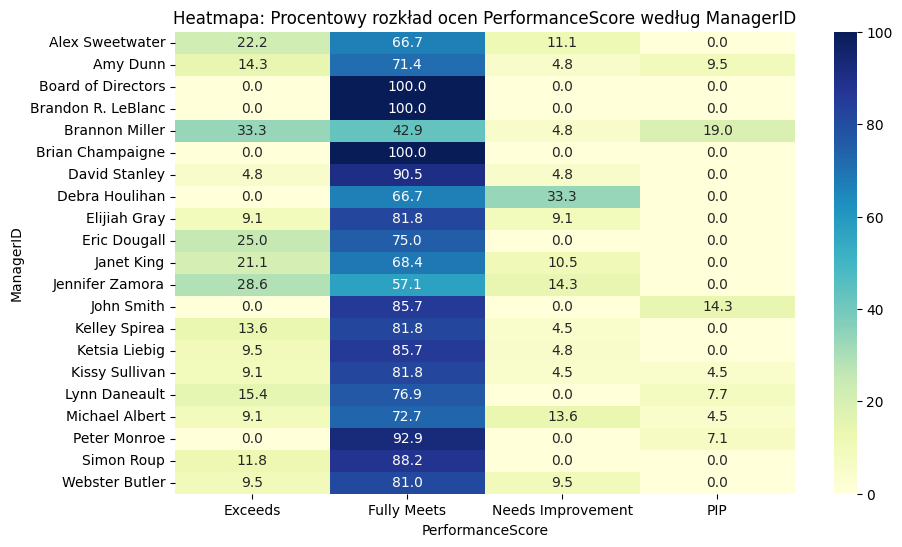

In [179]:
pivot_percentages = pivot.div(pivot.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_percentages, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Heatmapa: Procentowy rozkład ocen PerformanceScore według ManagerID')
plt.ylabel('ManagerID')
plt.xlabel('PerformanceScore')
plt.show()

## Odpowiedz
Istnieje zależność między bezpośrednim przełożonym a oceną wydajności pracy. Jak widać na heatmap niektórzy z managerów sprawiają że ocena jest lepsza a dla innych gorsza.

# Zadanie 2
### Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?

In [180]:
def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    return round((end_date - row['DateofHire']).days/365)

In [181]:
# RecruitmentSource
# DateofHire
# DateofTermination

df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')

df['Seniority'] = df.apply(lambda row: count_seniority(row), axis=1)
df['Seniority'].head()


0    11
1     6
2     5
3     0
4     4
Name: Seniority, dtype: int64

<Axes: xlabel='Seniority', ylabel='RecruitmentSource'>

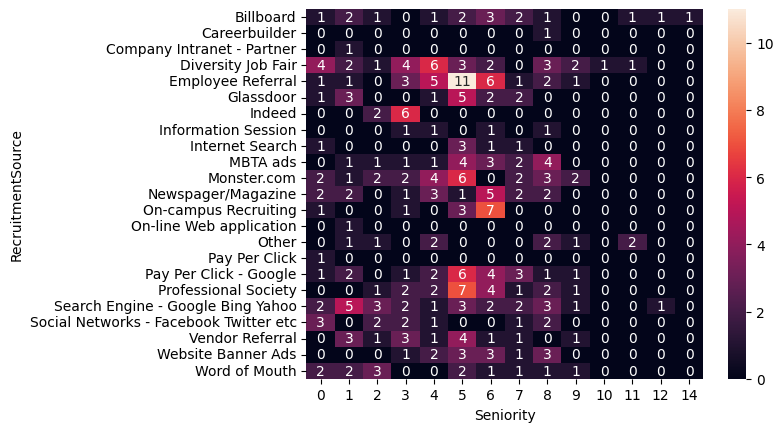

In [182]:
df['RecruitmentSource'].value_counts()

pivot_seniority = pd.pivot_table(df, index='RecruitmentSource', columns='Seniority', values='EmpID', aggfunc='count', fill_value=0)

sns.heatmap(pivot_seniority, annot=True)

## Odpowiedź
Najlepszymi źródłami pozyskania pracownika są:
- Employee Referral
- MBTA ads
- On-campus Recruiting
- Professional Society
- Pay Per Click - Google

# Zadanie 3
Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?

<Axes: title={'center': 'Zadowolenie z pracy w zależności od stanu cywilnego'}, xlabel='Stan cywilny', ylabel='Zadowolenie z pracy'>

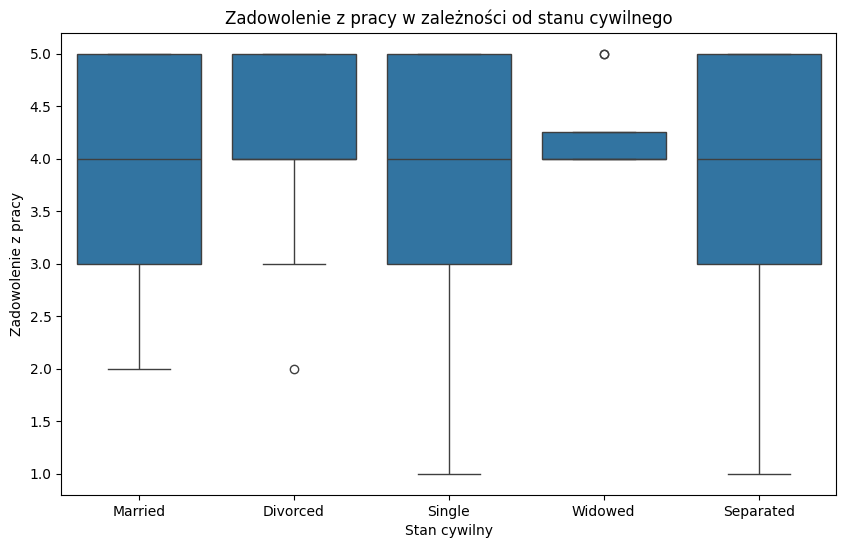

In [183]:
df['MaritalDesc'].value_counts().head()
df['EmpSatisfaction'].value_counts().head()

plt.figure(figsize=(10, 6))
plt.title('Zadowolenie z pracy w zależności od stanu cywilnego')
plt.ylabel('Zadowolenie z pracy')
plt.xlabel('Stan cywilny')
sns.boxplot(x='MaritalDesc', y='EmpSatisfaction', data=df)


<Axes: xlabel='MaritalStatusID', ylabel='EmpSatisfaction'>

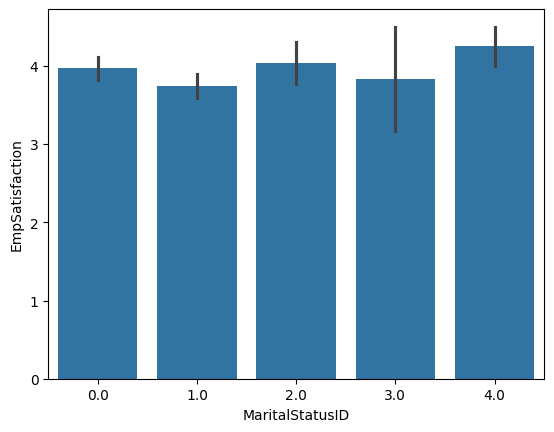

In [184]:
sns.barplot(x='MaritalStatusID', y='EmpSatisfaction', data=df)


<Axes: title={'center': 'Korelacja między statusem cywilnym a satysfakcją'}>

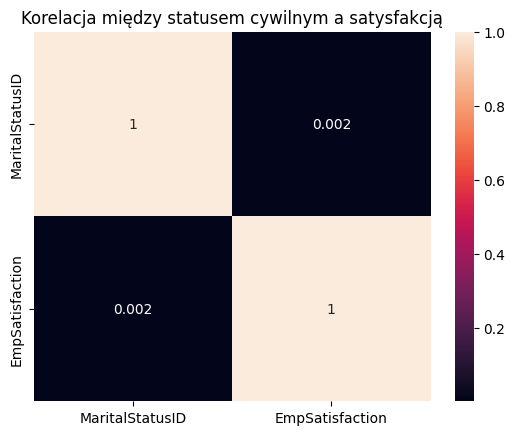

In [185]:

correlation = df[['MaritalStatusID', 'EmpSatisfaction']].corr()
plt.title('Korelacja między statusem cywilnym a satysfakcją')
sns.heatmap(correlation, annot=True)

## Odpowiedź
Stan cywilny nie koreluje z zadwoloniem z pracy

# Zadanie 4

In [186]:

df['DOB'] = pd.to_datetime(df['DOB'], format='%m/%d/%y')

def fix_year(date):
    if date.year > 2019:  # jeśli rok jest większy niż 2019
        return date.replace(year=date.year - 100)  # odejmujemy 100 lat
    return date

df['DOB'] = df['DOB'].apply(fix_year)
df['Age'] = df['DOB'].apply(lambda x: 2019 - x.year)

current_employees = df[df['DateofTermination'].isnull()].copy()


C:\Users\wista\AppData\Local\Temp\ipykernel_24652\1855718991.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(current_employees['Age'], bins=25)


<Axes: title={'center': 'Wiek pracowników'}, xlabel='Age', ylabel='Liczba pracowników'>

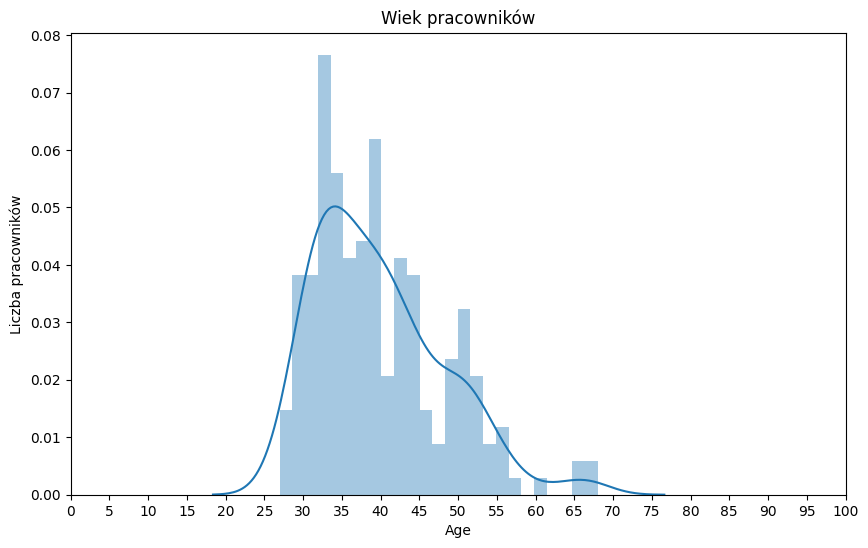

In [187]:
plt.figure(figsize=(10, 6))
plt.title('Wiek pracowników')
plt.xlabel('Wiek')
plt.ylabel('Liczba pracowników')
plt.xticks(range(0, 105, 5))
plt.xlim(0, None)
sns.distplot(current_employees['Age'], bins=25)

## Odpowiedź
Na powyższym wykresie jest przedstawiona struktura wieku aktualnie zatrudnionych pracowników

# Zadanie 5
Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

<Axes: title={'center': 'Liczba specjalnych projektów w zależności od wieku'}, xlabel='Age', ylabel='SpecialProjectsCount'>

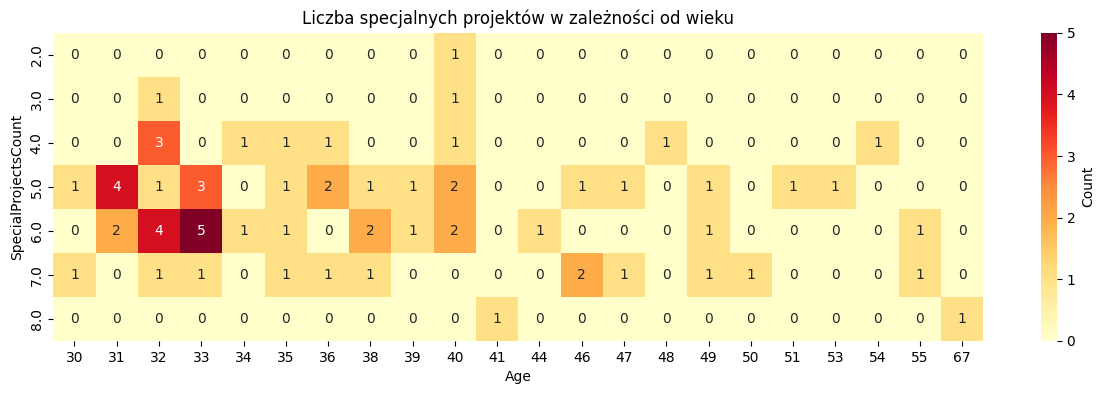

In [209]:

df['SpecialProjectsCount'].value_counts()
filtered_df = df[df['SpecialProjectsCount'] > 0]
pivot_table = pd.crosstab(filtered_df['SpecialProjectsCount'], filtered_df['Age'])

plt.figure(figsize=(15, 4))
plt.title('Liczba specjalnych projektów w zależności od wieku')
plt.xlabel('Wiek')
plt.ylabel('Liczba specjalnych projektów')
sns.heatmap(pivot_table, 
            annot=True,  # pokazuje wartości w komórkach
            fmt='d',     # formatuje liczby jako liczby całkowite
            cmap='YlOrRd',  # kolorowa mapa
            cbar_kws={'label': 'Count'})  # etykieta dla paska kolorów


## Odpowiedź 
Na powyższym wykresie widać że większością projektów specjalnych zajmują się ludzie młodzi do 40 roku życia. 